만들어진 딥러닝 모델을 업데이트하는 과정을 봅시다.

모델이 학습되는 과정을 history 변수에 저장합니다.

`history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)`
에서 validation_split을 정하면 df를 통해 가져온 샘플 중 33퍼센트를 테스트셋으로 사용하게 된다.

즉 pandas를 이용하지 않고 trainset과 testset을 나눌 수 있다.

In [ ]:
#데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'wine.csv'

!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# seed 값 설정
numpy.random.seed(3)
tf.compat.v1.set_random_seed(3)

#데이터 적용
df_pre = pd.read_csv(my_data, header=None)
df = df_pre.sample(frac=0.15) # 전체 샘플 중 15퍼센트만 가져온다.

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500) # 배치크기를 500으로 확장


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1001/3500
2/2 [==============================] - 0s 21ms/step - loss: 0.0450 - accuracy: 0.9804 - val_loss: 0.0958 - val_accuracy: 0.9752
Epoch 1002/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.0451 - accuracy: 0.9807 - val_loss: 0.0937 - val_accuracy: 0.9752
Epoch 1003/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.0465 - accuracy: 0.9817 - val_loss: 0.0936 - val_accuracy: 0.9720
Epoch 1004/3500
2/2 [==============================] - 0s 42ms/step - loss: 0.0458 - accuracy: 0.9804 - val_loss: 0.0942 - val_accuracy: 0.9752
Epoch 1005/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0453 - accuracy: 0.9828 - val_loss: 0.0936 - val_accuracy: 0.9752
Epoch 1006/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0446 - accuracy: 0.9817 - val_loss: 0.0934 - val_accuracy: 0.9752
Epoch 1007/3500
2/2 [==============================] - 0s 22ms/step - loss: 0.0445 - accuracy: 0.983

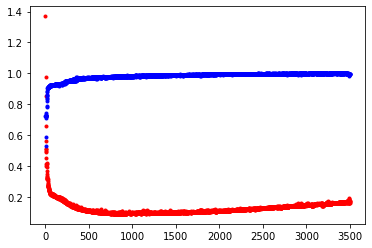

In [ ]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
# 'val_' prefix는 testset을 의미한다.
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
# 'acc'는 현재 버전에서는 없으니 'accuracy'라고 적어주어야한다.
y_acc = history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

https://www.tensorflow.org/api_docs/python/tf/keras/Model
에서 model.fit 메서드를 봅시다. 그러면 return 부분에 다음과 같이 써져있습니다.

A History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
(History 개체입니다. History.history 속성은 검증 손실 값 및 검증 메트릭 값 (해당되는 경우)뿐만 아니라 연속적인 반복에서의 훈련 손실 값 및 메트릭 값의 기록입니다.)

즉 history 객체를 통해서 trainset, testset의 각종 metric에 접근할 수 있단 겁니다.

----

numpy.arange()메서드를 보면,
https://numpy.org/doc/stable/reference/generated/numpy.arange.html

주어진 간격 내에서 균일 한 간격의 값을 반환합니다.

`x_len = numpy.arange(len(y_acc))`는 0부터 y_acc의 길이까지 1의 간격으로 나눈 배열을 받습니다.